In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential, load_model
from keras.layers.core import Activation
from keras.models import Model
from keras import backend as K
from keras.utils import np_utils

from keras.datasets import mnist
import numpy as np

import matplotlib.pyplot as plt

from keras import regularizers

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


# **Simple Autoencoder**

In [3]:
# encoder dimension
encoding_dim = 64  

# Input placeholder
input_img = Input(shape=(784,))

# encoded - encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded - lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# autoencoder - model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# encoder - model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Placeholder for an encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile  model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

# Fit the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.2428 - val_loss: 0.1584
Epoch 2/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.1415 - val_loss: 0.1250
Epoch 3/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1170 - val_loss: 0.1075
Epoch 4/50
60000/60000 [===========

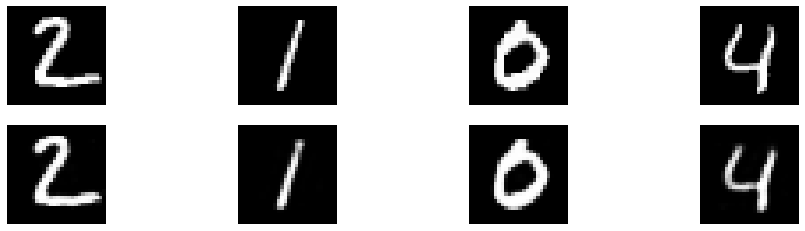

In [4]:
# encode and decode some digits
# encoded_imgs - encoded representation of test image
encoded_imgs = encoder.predict(x_test)

# decoded_imgs - decoded representation of test image
decoded_imgs = decoder.predict(encoded_imgs)

n = 5  # Display 4 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
# Calculate the mean of encoded representation of all test images
encoded_imgs.mean()

6.6946883

# **Sparse Autoencoder**

In [6]:
# encoder dimension
encoding_dim = 64  

# Input placeholder
input_img = Input(shape=(784,))

# encoded - encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(0.5e-5))(input_img)

# decoded - lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# autoencoder - model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# encoder - model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Placeholder for an encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile  model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

# Fit the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.3395 - val_loss: 0.2207
Epoch 2/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2007 - val_loss: 0.1851
Epoch 3/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1782 - val_loss: 0.1703
Epoch 4/50
60000/60000 [===========

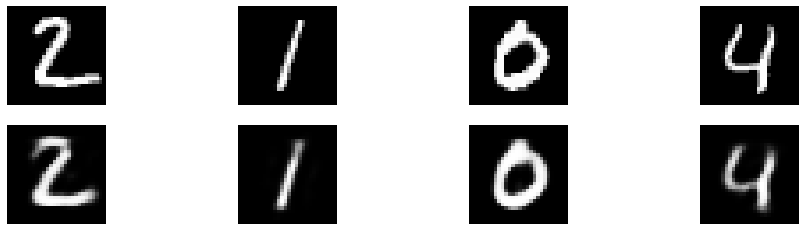

In [7]:
# encode and decode some digits
# encoded_imgs - encoded representation of test image
encoded_imgs = encoder.predict(x_test)

# decoded_imgs - decoded representation of test image
decoded_imgs = decoder.predict(encoded_imgs)

n = 5  # Display 4 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
# Calculate the mean of encoded representation of all test images
encoded_imgs.mean()

0.18285818

As you can see the mean of encoded images using sparse auto encoder is very less compared to simple auto encoder.